Files in 'F:\\Github\\all_about_time_series_data': ['.ipynb_checkpoints', 'join_two_datasets.ipynb', 'join_two_datasets_sampled.ipynb', 'QLD_open_data', 'sampling.ipynb']
baffle-quality.csv
                     EXO-TempC  EXO-TurbNTU  EXO-SpCondmScm  EXO-DOPerSat  \
TIMESTAMP                                                                   
2019-11-28 04:20:00     28.566         9.31          56.132         87.68   
2019-11-28 04:30:00     28.539         9.43          56.247         87.40   
2019-11-28 04:40:00     28.497        28.70          56.205         85.97   
2019-11-28 04:50:00     28.472        15.37          56.109         85.47   
2019-11-28 05:00:00     28.442        32.50          56.086         83.70   
2019-11-28 05:10:00     28.439         9.43          56.108         82.92   
2019-11-28 05:20:00     28.431        11.76          56.100         84.00   
2019-11-28 05:30:00     28.414        10.87          56.144         84.15   
2019-11-28 05:40:00     28.413         9

<Figure size 1440x1440 with 0 Axes>

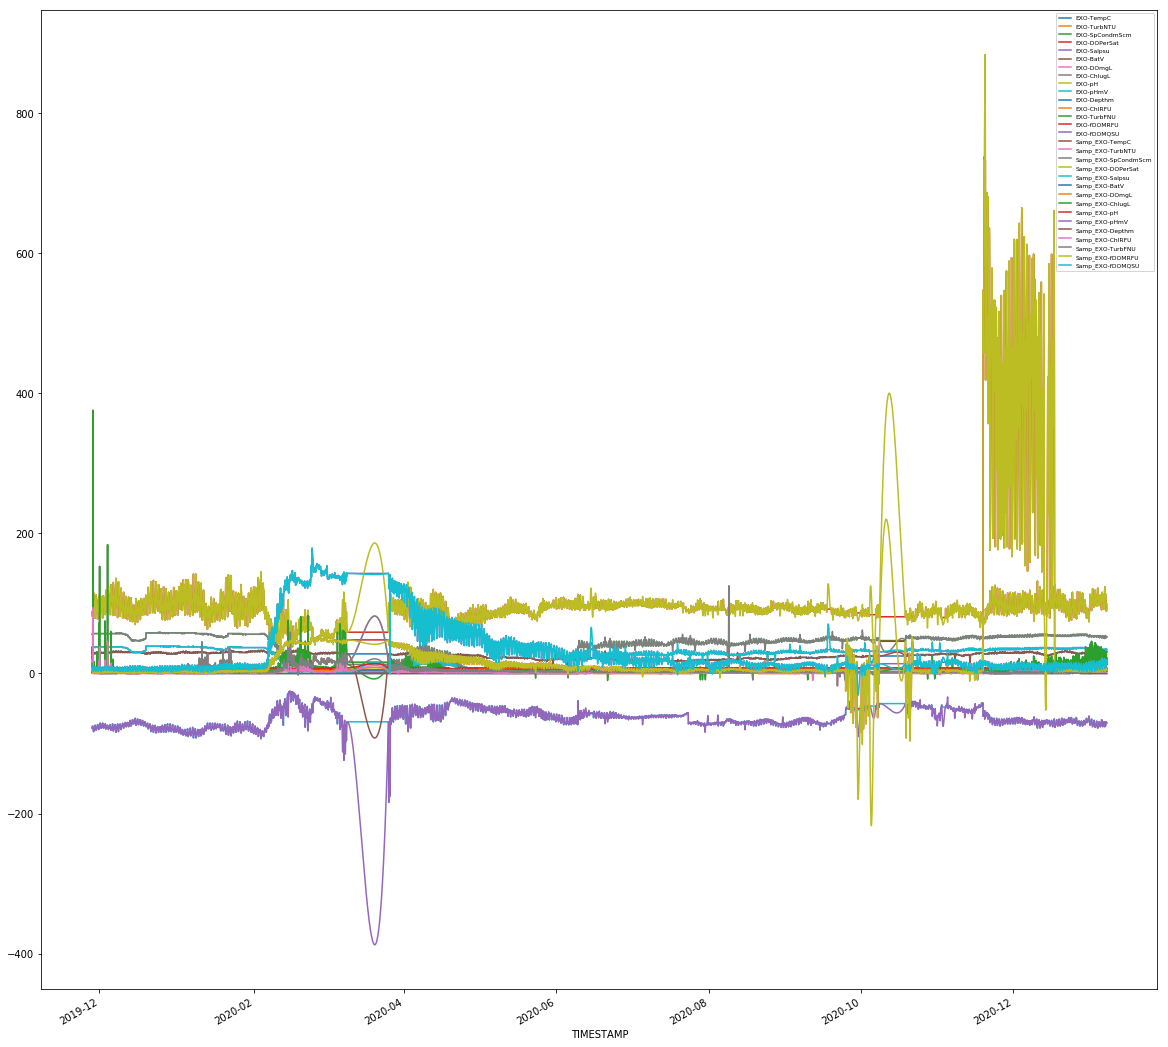

burnett.csv
                     RECORD  Temp_degC  EC_uScm    pH  DO_Sat  DO_mg  \
TIMESTAMP                                                              
2019-12-31 00:03:30  108437      27.24  49910.0  7.87    96.6   6.39   
2019-12-31 00:33:30  108438      27.24  49860.0  7.89    98.3   6.50   
2019-12-31 01:03:30  108439      27.24  49850.0  7.88    97.7   6.46   
2019-12-31 01:33:30  108440      27.12  49830.0  7.91    96.3   6.38   
2019-12-31 02:03:30  108441      27.14  49620.0  7.88    98.1   6.50   
2019-12-31 02:33:30  108442      27.18  49430.0  7.84    97.3   6.45   
2019-12-31 03:03:30  108443      27.19  49270.0  7.82    97.6   6.48   
2019-12-31 03:33:30  108444      27.19  49080.0  7.84    98.2   6.52   
2019-12-31 04:03:30  108445      27.15  48810.0  7.80    98.3   6.54   
2019-12-31 04:33:30  108446      27.10  48630.0  7.79    97.8   6.51   

                     Turbidity_NTU  Chloraphylla_ugL  
TIMESTAMP                                             
2019-12-31 00

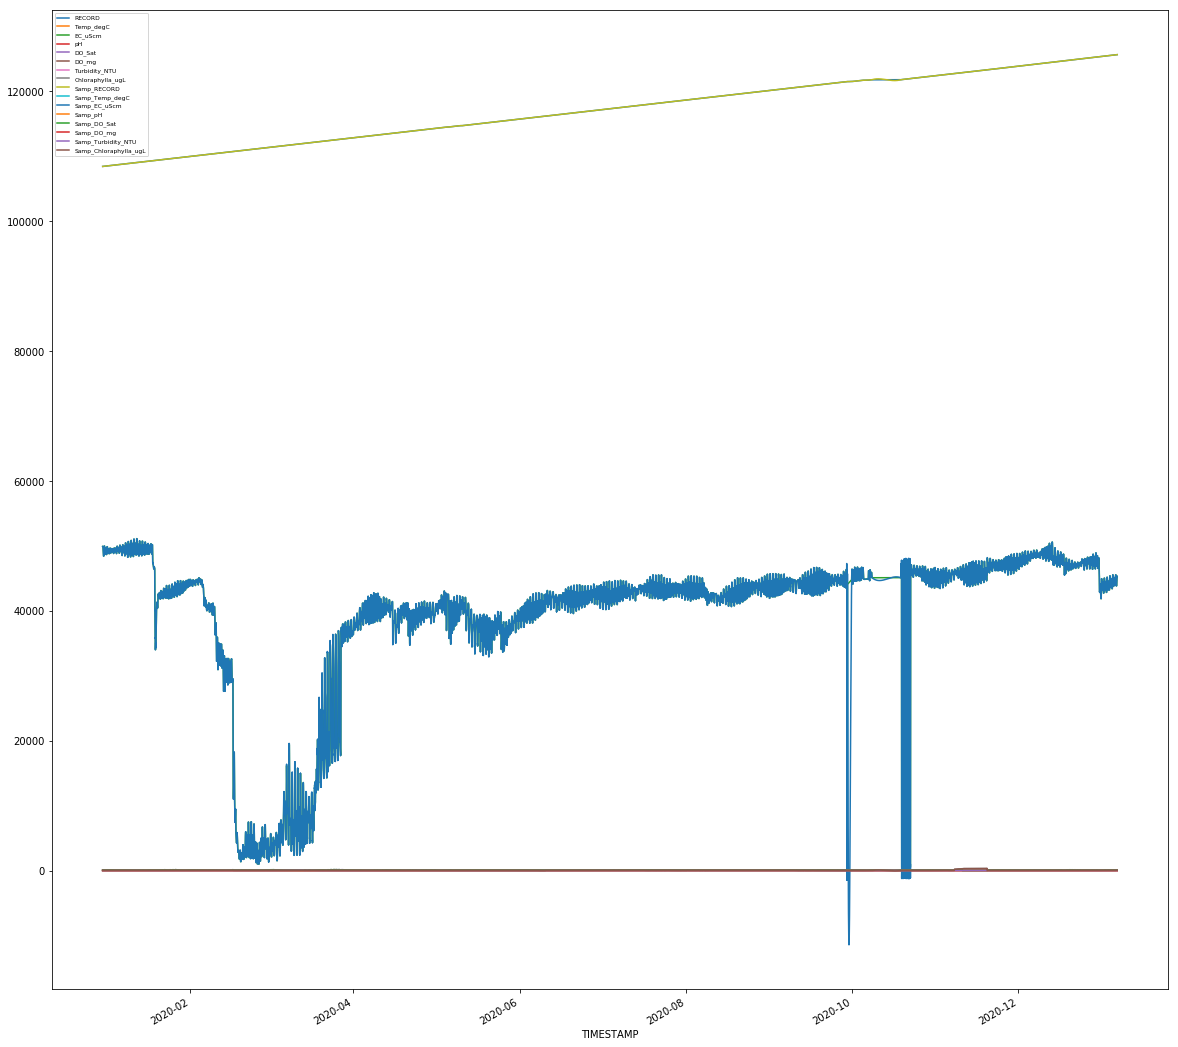

In [16]:
# -*- coding: utf-8 -*-
"""
Sampling two datasets 

Created on Wed Jan  6 14:24:54 2021

@author: kanchana
"""
import matplotlib as mpl
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns


# figure size globally set for matplotlib
mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['axes.grid'] = False


cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

path = cwd+'/QLD_open_data/selected' # use your path

all_files = glob.glob(path + "/*.csv")

fig = plt.figure()

#num_lines = 6
pal1 = sns.color_palette('rainbow', num_lines)

for filename in all_files:
    df = pd.read_csv(filename, index_col=False, header=0)
    #print (filename)
    filename_w_ext = os.path.basename(filename)
    print(filename_w_ext)
    exact_filename, file_extension = os.path.splitext(filename_w_ext)
    
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'],  format="%Y-%m-%d %H:%M:%S" , errors='coerce')
    df = df.set_index('TIMESTAMP')
    
    print(df.head(10))
    
    df = df.rolling(10, min_periods=1).median().round(0)
    sampled = df.resample('10Min').median()
    sampled= sampled.interpolate(method='cubic')
    sampled.columns = ['Samp_'+str(col)  for col in sampled.columns]
    sampled.to_csv(cwd+'/QLD_open_data/sampled/'+filename_w_ext)
    print('finished')
    
    ax = df.plot()
    #ax.set_prop_cycle(sns.color_palette("muted"),num_lines)
    sampled.plot(ax=ax)
    plt.legend(loc='best',prop={'size': 6}) 
    plt.show() 
    
    
